In [1]:
import pandas as pd
import os
import seaborn as sns
# import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.svm import SVC
import zipfile
import os

c:\Users\Abdulwadood\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Abdulwadood\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\Abdulwadood\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:

# Unzip the file
# with zipfile.ZipFile('/mnt/data/OneDrive_1_9-12-2023.zip', 'r') as zip_ref:
#     zip_ref.extractall('/mnt/data/extracted_data')

# List the files in the extracted directory
files_list = os.listdir('extracted_data')
# Re-importing and consolidating the data
consolidated_data_reimported = pd.DataFrame()

csv_files = {}

for day_folder in files_list:
    day_path = os.path.join('extracted_data', day_folder)
    
    # Filtering for files that match the criteria
    valid_files = [file for file in os.listdir(day_path) if file.startswith('S') and file.endswith('.csv') and file[1:].replace('.csv', '').isdigit()]
    
    csv_files[day_folder] = valid_files

print(csv_files)

{'day 1': ['S1.csv', 'S2.csv', 'S3.csv', 'S4.csv', 'S5.csv', 'S6.csv', 'S7.csv', 'S8.csv', 'S9.csv'], 'day 2': ['S1.csv', 'S2.csv', 'S3.csv', 'S4.csv', 'S5.csv', 'S6.csv', 'S7.csv', 'S8.csv', 'S9.csv'], 'day 3': ['S1.csv', 'S2.csv', 'S3.csv', 'S4.csv', 'S5.csv', 'S6.csv', 'S7.csv', 'S8.csv', 'S9.csv']}


In [12]:
for day, files in csv_files.items():
    for file in files:
        file_path = os.path.join('extracted_data', day, file)
        
        # Define columns based on the file name
        freq_label = file.replace('.csv', '')
        columns = [f'{freq_label}f', f' {freq_label}Zc', f' {freq_label}Pc']
        
        # Read the csv file and select relevant columns
        df = pd.read_csv(file_path, usecols=columns)
        
        # Rename the columns to standard names
        df.columns = ['f', 'Zc', 'Pc']
        
        # Add day and frequency label
        df['day'] = day
        df['frequency_label'] = freq_label
        
        consolidated_data_reimported = pd.concat([consolidated_data_reimported,df], ignore_index=True)
consolidated_data_reimported.head()

,f,Zc,Pc,day,frequency_label
0,3.0,16100.0,-12.3,day 1,S1
1,4.0,15200.0,-12.4,day 1,S1
2,5.0,14500.0,-12.6,day 1,S1
3,6.0,14000.0,-12.4,day 1,S1
4,7.0,13600.0,-12.2,day 1,S1


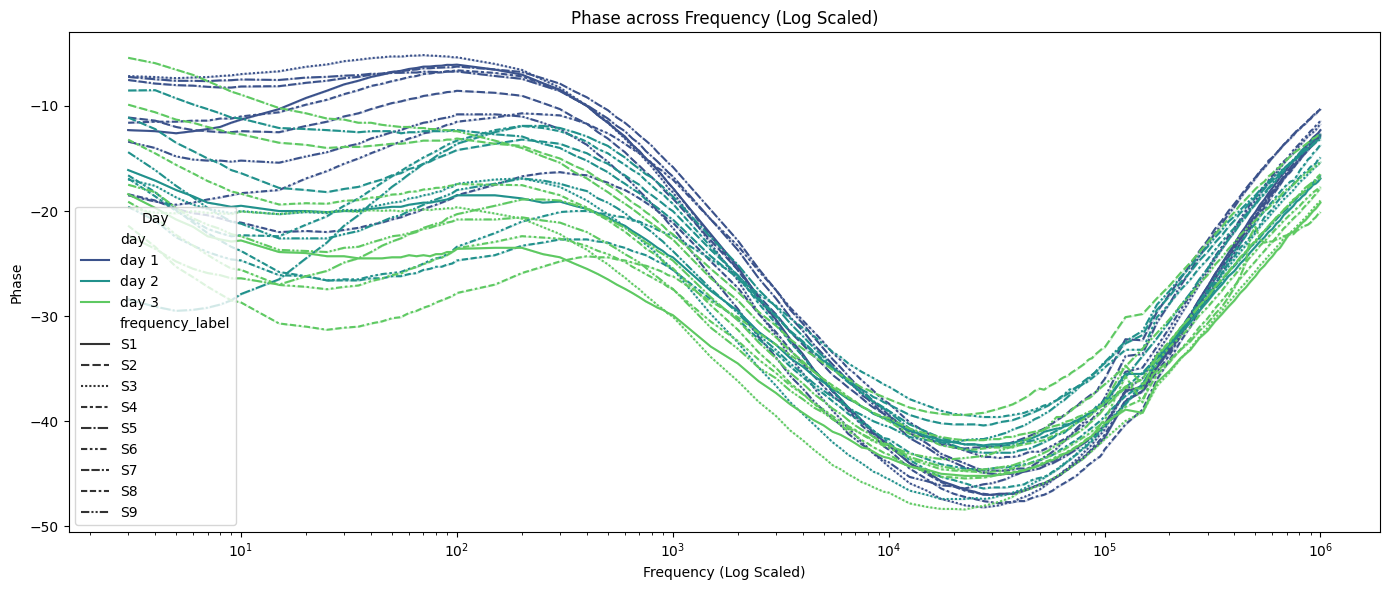

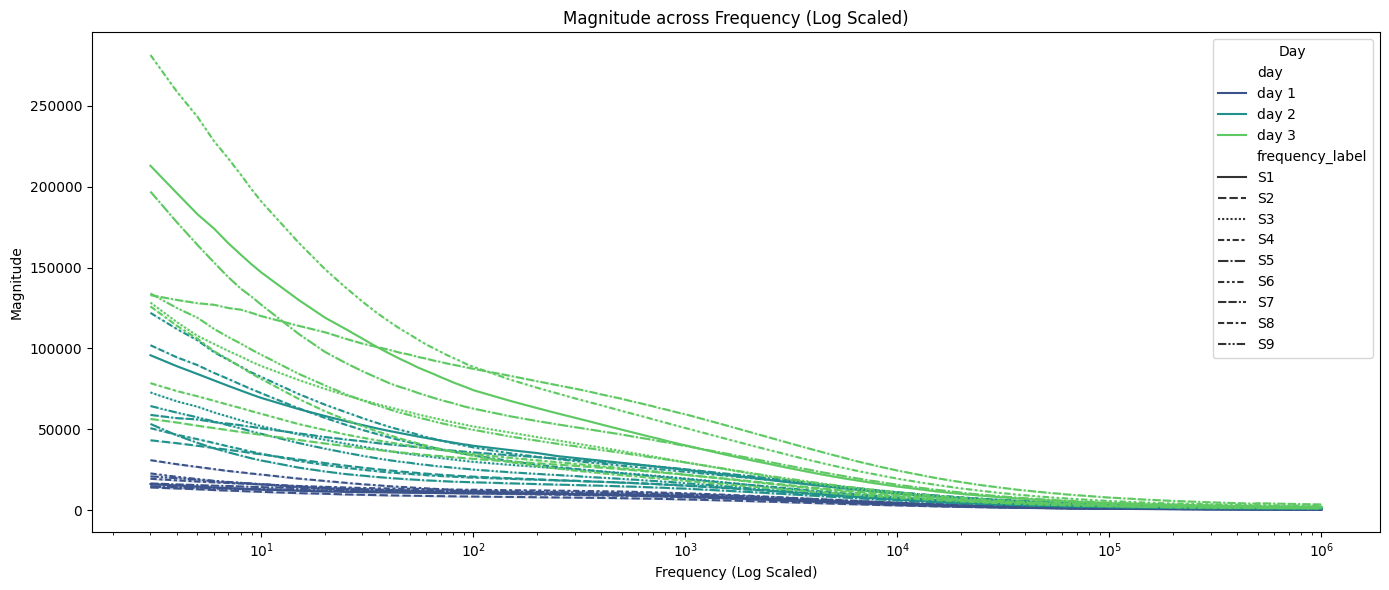

In [16]:

# Plotting

# Phase
plt.figure(figsize=(14, 6))
sns.lineplot(data=consolidated_data_reimported, x='f', y='Pc', hue='day',style='frequency_label', palette='viridis')
plt.xscale('log')
plt.title('Phase across Frequency (Log Scaled)')
plt.xlabel('Frequency (Log Scaled)')
plt.ylabel('Phase')
plt.legend(title='Day')
plt.tight_layout()
plt.show()

# Magnitude
plt.figure(figsize=(14, 6))
sns.lineplot(data=consolidated_data_reimported, x='f', y='Zc', hue='day',style='frequency_label', palette='viridis')
plt.xscale('log')
plt.title('Magnitude across Frequency (Log Scaled)')
plt.xlabel('Frequency (Log Scaled)')
plt.ylabel('Magnitude')
plt.legend(title='Day')
plt.tight_layout()
plt.show()

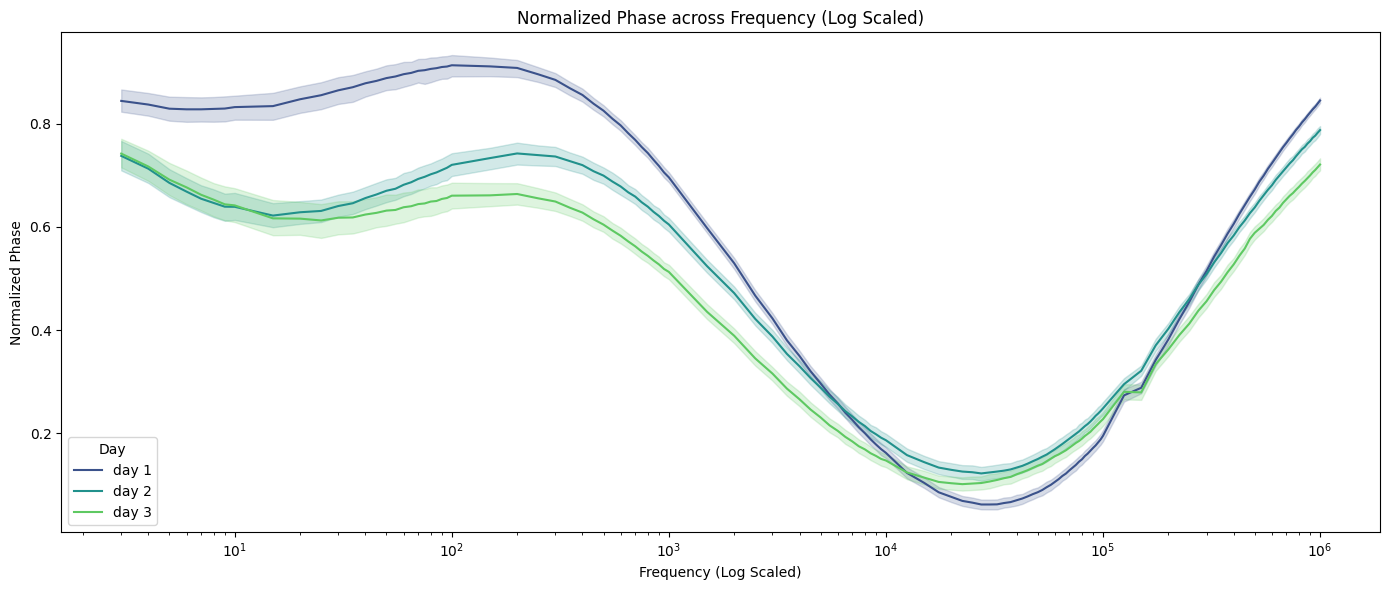

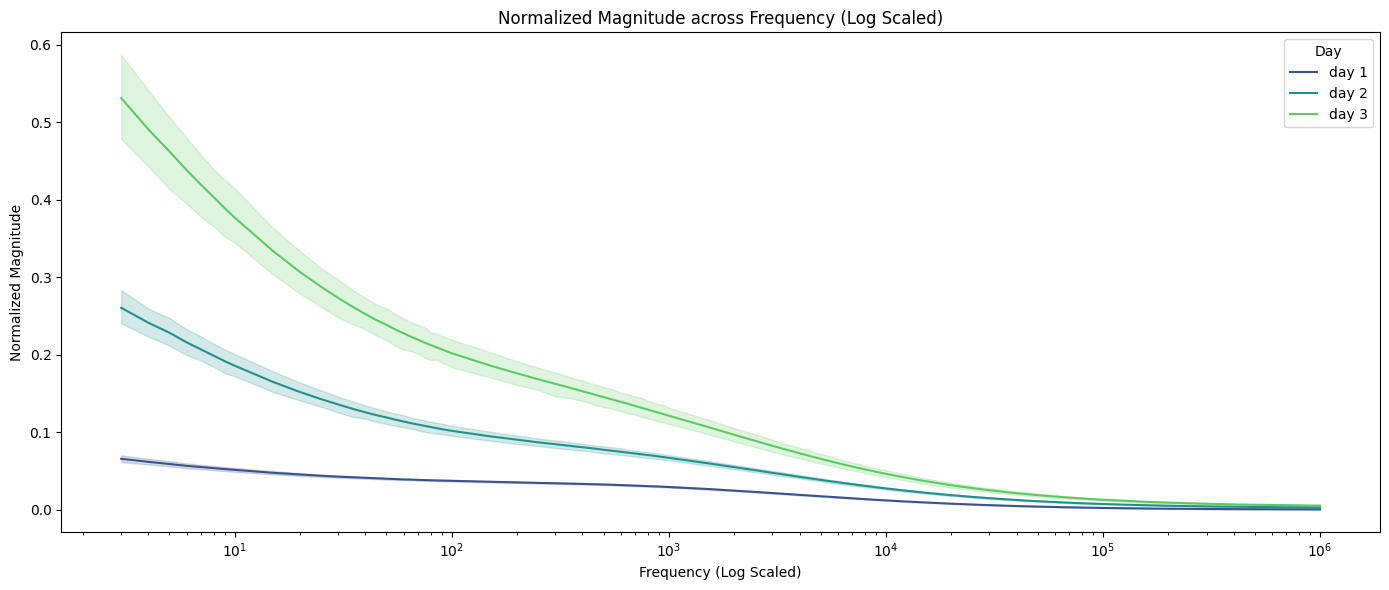

In [17]:

from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the 'Pc' and 'Zc' columns
consolidated_data_reimported['Pc_normalized'] = scaler.fit_transform(consolidated_data_reimported[['Pc']])
consolidated_data_reimported['Zc_normalized'] = scaler.fit_transform(consolidated_data_reimported[['Zc']])

# Plotting the normalized data

# Normalized Phase
plt.figure(figsize=(14, 6))
sns.lineplot(data=consolidated_data_reimported, x='f', y='Pc_normalized', hue='day', palette='viridis')
plt.xscale('log')
plt.title('Normalized Phase across Frequency (Log Scaled)')
plt.xlabel('Frequency (Log Scaled)')
plt.ylabel('Normalized Phase')
plt.legend(title='Day')
plt.tight_layout()
plt.show()

# Normalized Magnitude
plt.figure(figsize=(14, 6))
sns.lineplot(data=consolidated_data_reimported, x='f', y='Zc_normalized', hue='day', palette='viridis')
plt.xscale('log')
plt.title('Normalized Magnitude across Frequency (Log Scaled)')
plt.xlabel('Frequency (Log Scaled)')
plt.ylabel('Normalized Magnitude')
plt.legend(title='Day')
plt.tight_layout()
plt.show()


In [18]:

# Reshaping the data correctly
df_pca = consolidated_data_reimported.pivot_table(index=['day', 'frequency_label'], columns='f', values=['Pc', 'Zc'])
df_pca.columns = ['_'.join(map(str, col)).strip() for col in df_pca.columns.values]

# Standardizing the reshaped data
scaled_data = scaler.fit_transform(df_pca)

# Initializing PCA again
pca = PCA()

# Running PCA on the standardized data
pca_data = pca.fit_transform(scaled_data)

# Compute the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

print(cumulative_variance)


[0.59918425 0.80650533 0.92574515 0.9620593  0.98748321 0.99360026
 0.99776841 0.99880753 0.99921302 0.99939197 0.99951599 0.99962626
 0.99972149 0.999787   0.99983252 0.99987234 0.99990923 0.99993505
 0.99995394 0.99996525 0.99997472 0.99998212 0.99998747 0.99999208
 0.99999617 1.         1.        ]


c:\Users\Abdulwadood\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Abdulwadood\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Abdulwadood\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Abdulwadood\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows 

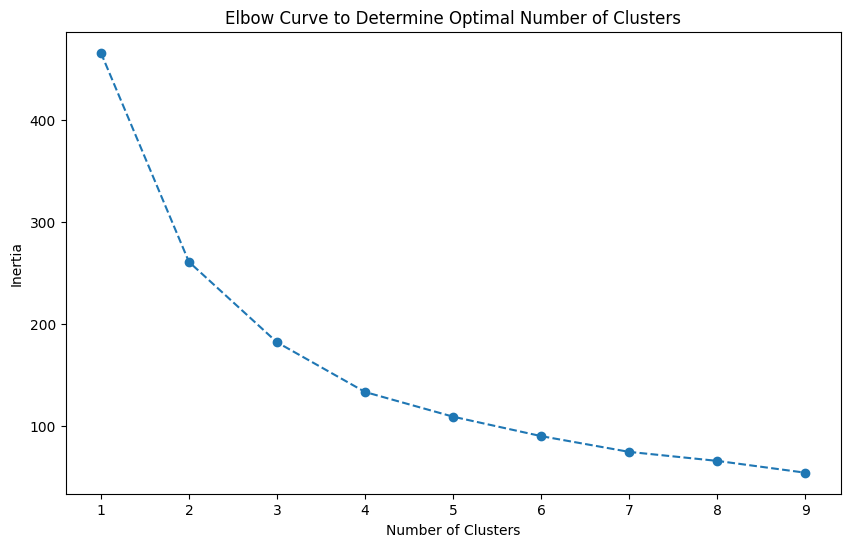

In [19]:

from sklearn.cluster import KMeans

# Reducing to 4 principal components
pca_4 = PCA(n_components=4)
pca_data_4 = pca_4.fit_transform(scaled_data)

# Determine optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(pca_data_4)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--')
plt.title('Elbow Curve to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()



c:\Users\Abdulwadood\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Abdulwadood\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


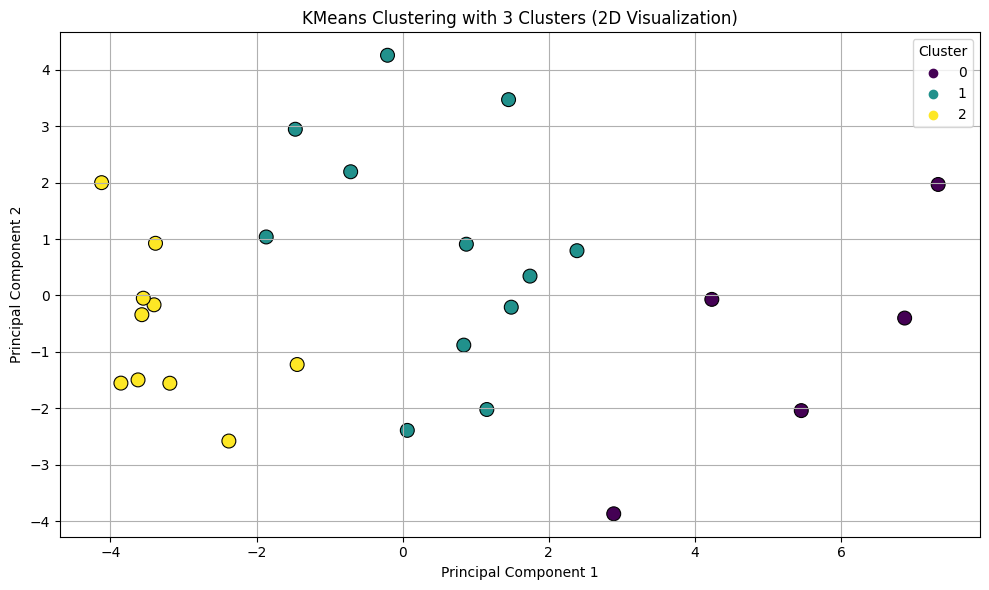

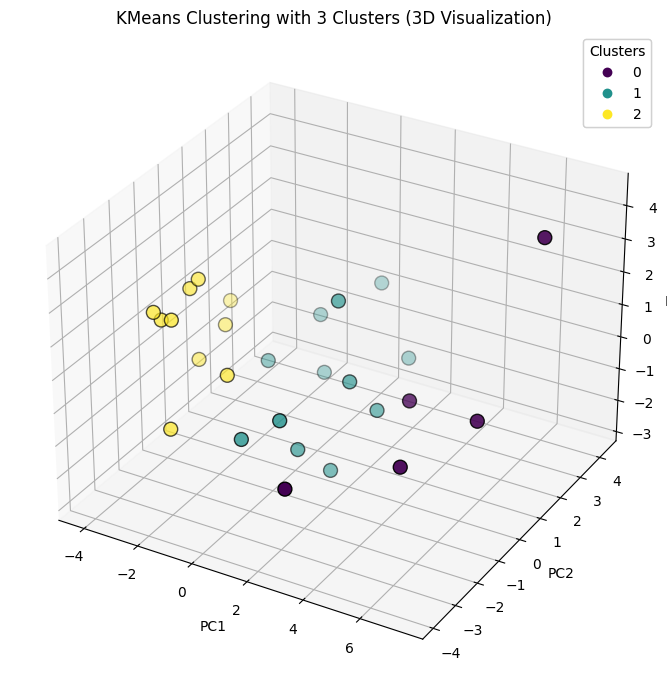

In [21]:
# KMeans clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_3.fit_predict(pca_data_4)

# Visualizing the clustering results in the reduced dimensional space

# 2D Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data_4[:, 0], y=pca_data_4[:, 1], hue=clusters, palette='viridis', s=100, edgecolor='k')
plt.title('KMeans Clustering with 3 Clusters (2D Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_data_4[:, 0], pca_data_4[:, 1], pca_data_4[:, 2], c=clusters, cmap='viridis', s=100, edgecolor='k')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('KMeans Clustering with 3 Clusters (3D Visualization)')
plt.tight_layout()
plt.show()


c:\Users\Abdulwadood\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Abdulwadood\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


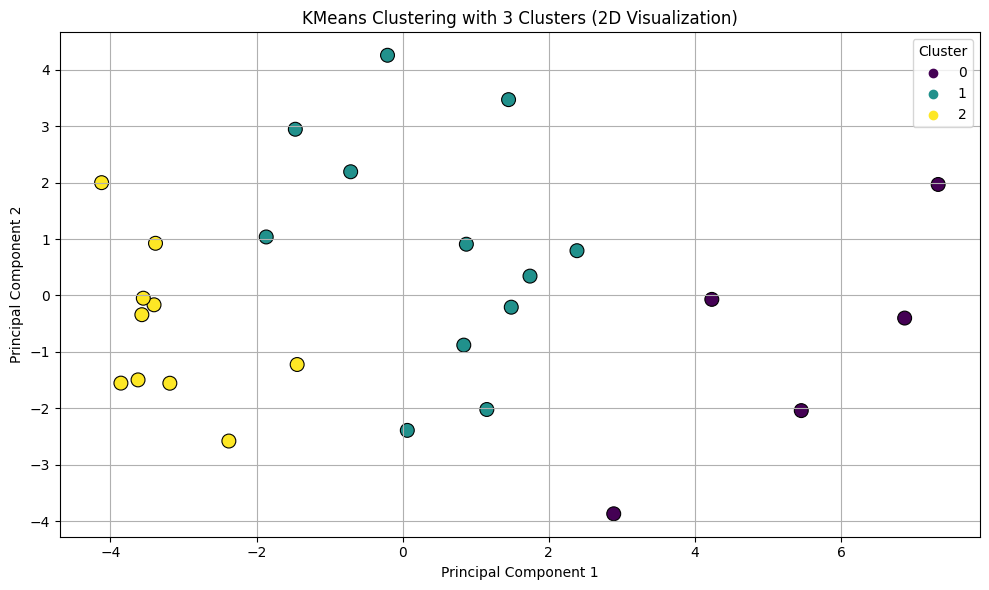

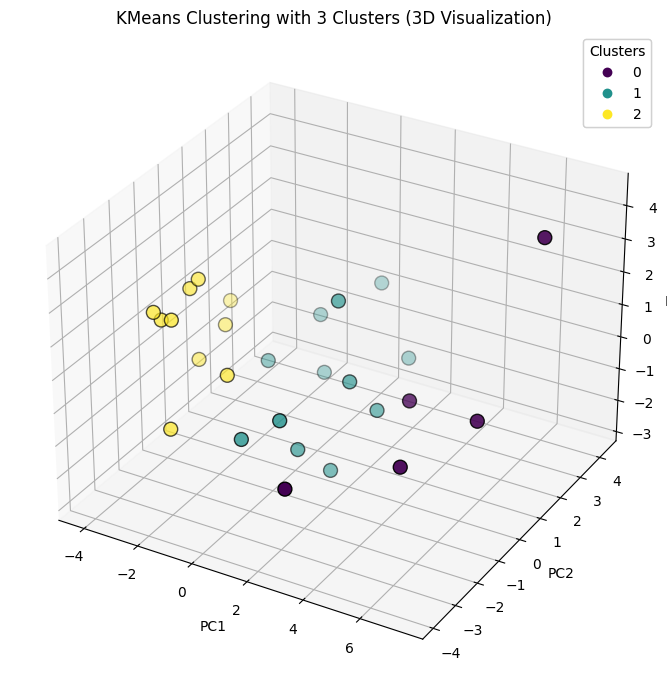

In [22]:


# Running PCA on the correctly reshaped data
pca_data_4_corrected = pca_4.fit_transform(scaled_data)

# KMeans clustering with 3 clusters on the corrected PCA data
clusters_corrected = kmeans_3.fit_predict(pca_data_4_corrected)

# Visualizing the corrected clustering results

# 2D Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data_4_corrected[:, 0], y=pca_data_4_corrected[:, 1], hue=clusters_corrected, palette='viridis', s=100, edgecolor='k')
plt.title('KMeans Clustering with 3 Clusters (2D Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_data_4_corrected[:, 0], pca_data_4_corrected[:, 1], pca_data_4_corrected[:, 2], c=clusters_corrected, cmap='viridis', s=100, edgecolor='k')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('KMeans Clustering with 3 Clusters (3D Visualization)')
plt.tight_layout()
plt.show()


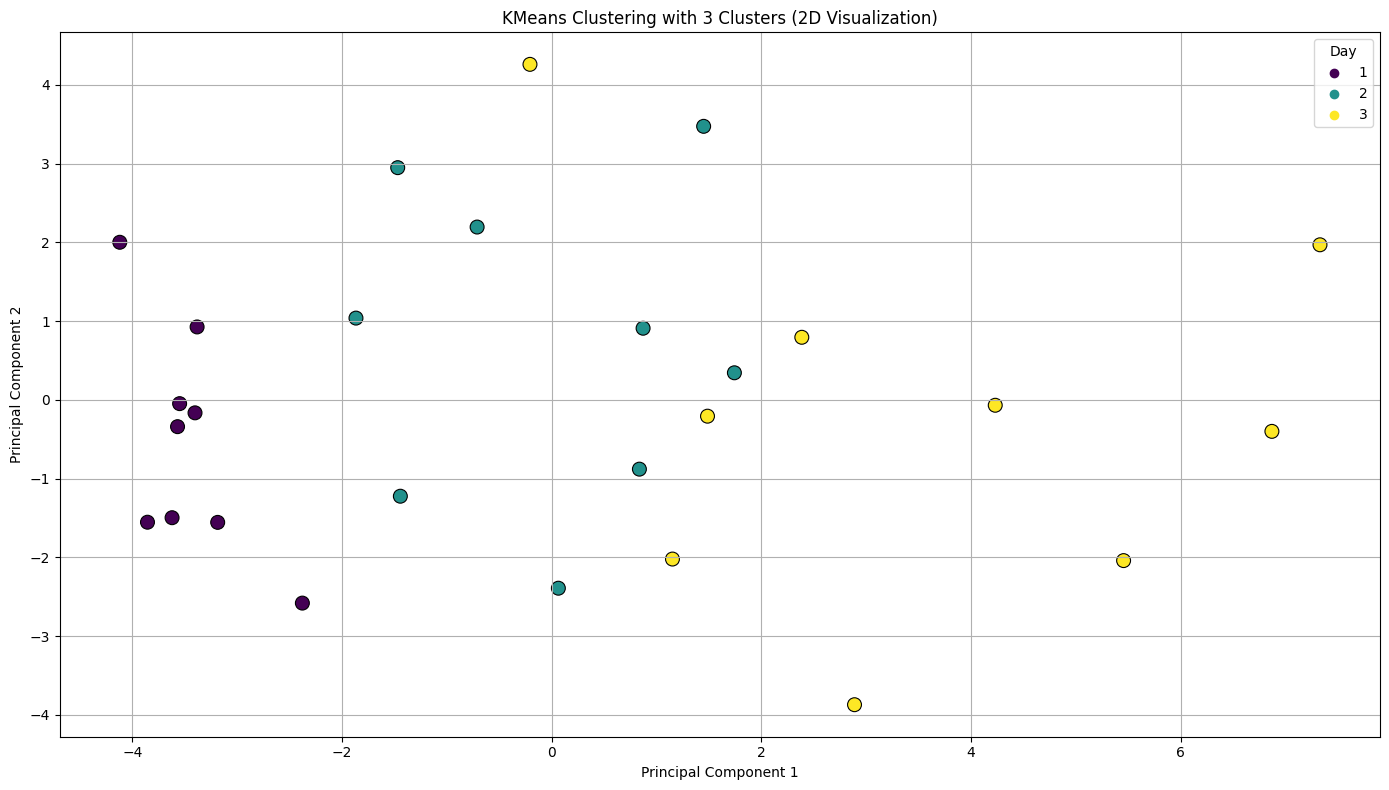

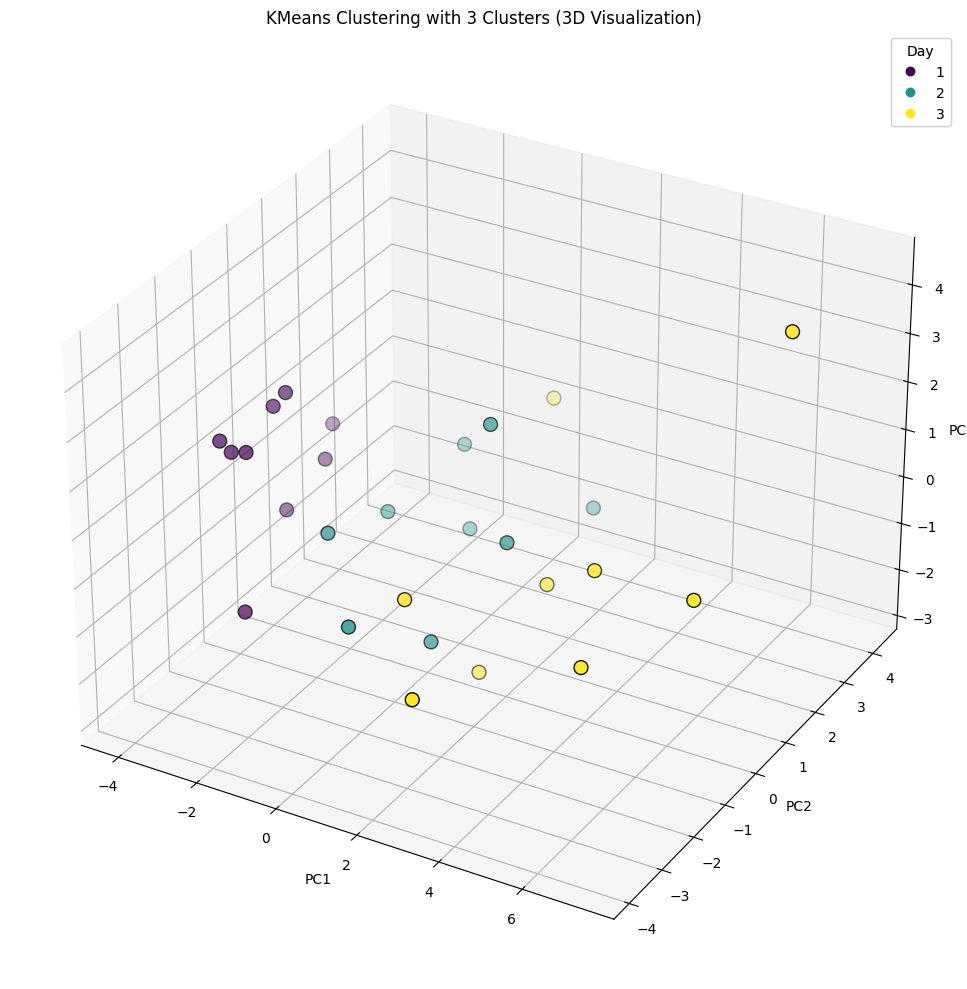

In [23]:

# Mapping day labels to integers for color coding
day_mapping = {'day 1': 1, 'day 2': 2, 'day 3': 3}
day_int_labels = df_pca.index.get_level_values(0).map(day_mapping)

# 2D Plot color-coded by day
plt.figure(figsize=(14, 8))
sns.scatterplot(x=pca_data_4_corrected[:, 0], y=pca_data_4_corrected[:, 1], hue=day_int_labels, palette='viridis', s=100, edgecolor='k')
plt.title('KMeans Clustering with 3 Clusters (2D Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Day')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3D Plot color-coded by day
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_data_4_corrected[:, 0], pca_data_4_corrected[:, 1], pca_data_4_corrected[:, 2], c=day_int_labels, cmap='viridis', s=100, edgecolor='k')
legend1 = ax.legend(*scatter.legend_elements(), title="Day")
ax.add_artist(legend1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('KMeans Clustering with 3 Clusters (3D Visualization)')
plt.tight_layout()
plt.show()


In [26]:
day_int_labels

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3],
      dtype='int64', name='day')

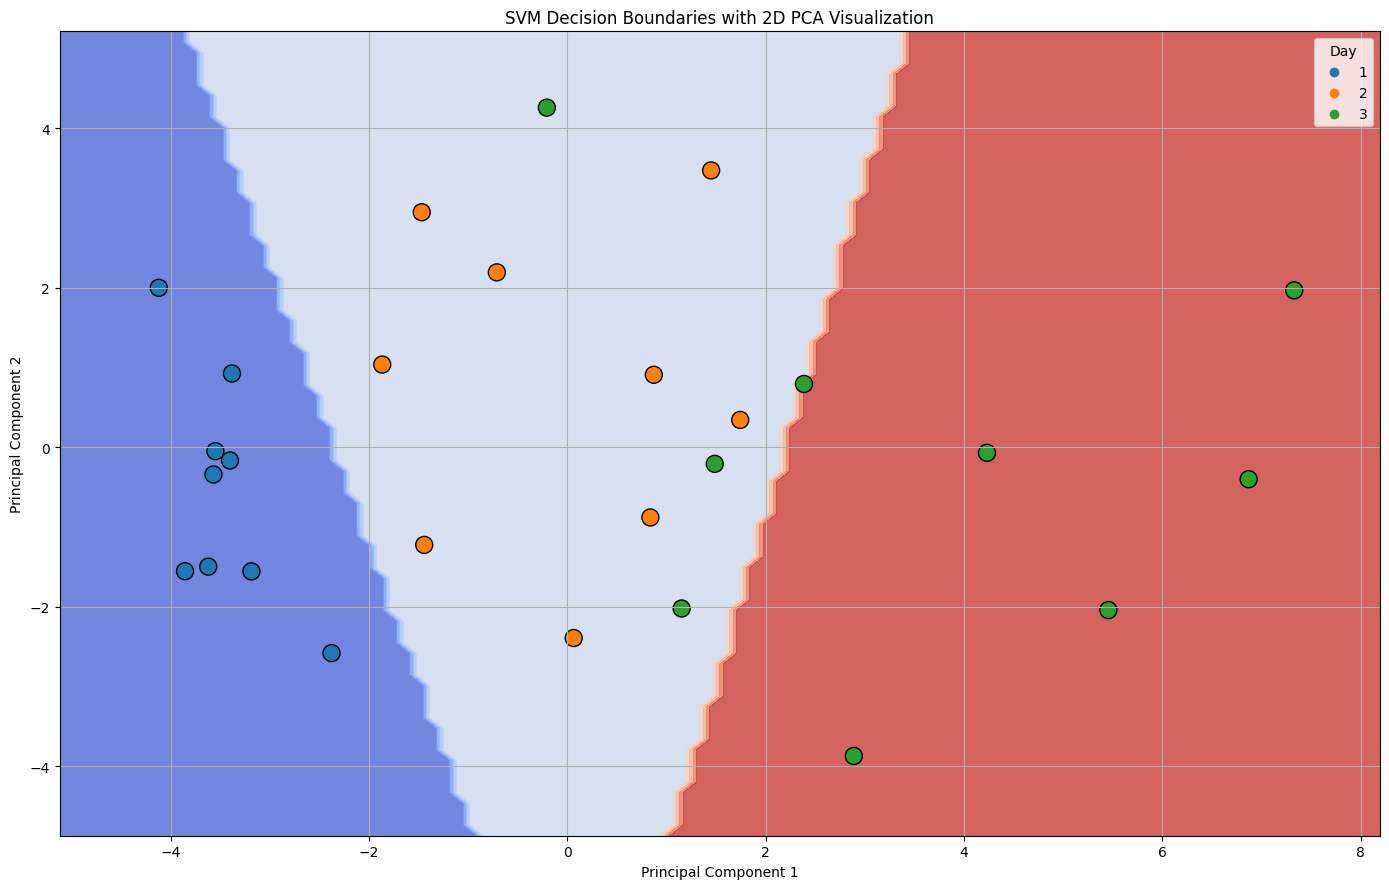

In [24]:

from sklearn.svm import SVC

# Preparing data and labels
X = pca_data_4_corrected[:, :2]  # Considering only the first two principal components
y = day_int_labels

# Training the SVM classifier
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X, y)

# Plotting the SVM decision boundaries on the 2D visualization

# Create a grid to plot decision boundaries
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# Adjusting the step size to prevent a large grid size
h = (x_max - x_min) / 100

# Recreating the grid with the adjusted step size
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the decision boundaries
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the 2D visualization with SVM decision boundaries
plt.figure(figsize=(14, 9))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='tab10', s=150, edgecolor='k', marker='o')
plt.title('SVM Decision Boundaries with 2D PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Day', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


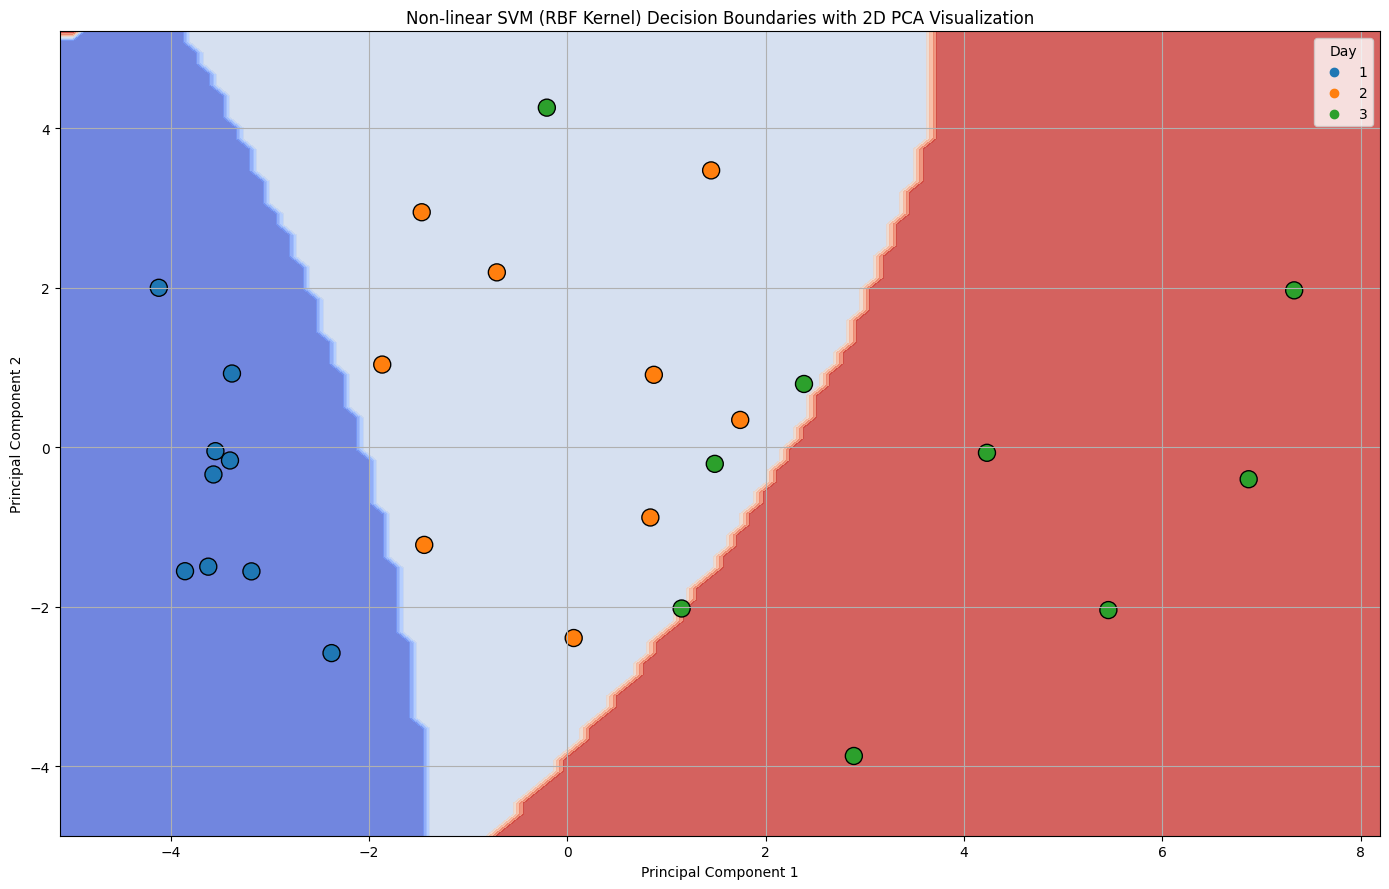

In [25]:

from sklearn.svm import SVC
# Non-linear SVM classification using the RBF kernel
svm_rbf_classifier = SVC(kernel='rbf', C=1)
svm_rbf_classifier.fit(pca_data_4[:, :2], day_int_labels)

# Predicting the decision boundaries
Z_rbf = svm_rbf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

# Plotting the 2D visualization with SVM decision boundaries using RBF kernel
plt.figure(figsize=(14, 9))
plt.contourf(xx, yy, Z_rbf, cmap='coolwarm', alpha=0.8)
sns.scatterplot(x=pca_data_4[:, 0], y=pca_data_4[:, 1], hue=day_int_labels, palette='tab10', s=150, edgecolor='k', marker='o')
plt.title('Non-linear SVM (RBF Kernel) Decision Boundaries with 2D PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Day', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# Initialize LeaveOneOut cross-validator
loo = LeaveOneOut()

# Separate the features and labels
X = pca_data_4[:, :2]  # Assuming pca_data_4 has been defined in your original code
y = day_int_labels  # Assuming day_int_labels has been defined in your original code

accuracies = []

# Iterate over each train-test split
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Non-linear SVM classification using the RBF kernel
    svm_rbf_classifier = SVC(kernel='rbf', C=1)
    svm_rbf_classifier.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = svm_rbf_classifier.predict(X_test)
    
    # Calculate accuracy for this iteration
    accuracies.append(accuracy_score(y_test, y_pred))

# Compute overall accuracy
overall_accuracy = np.mean(accuracies)
overall_accuracy


0.7407407407407407

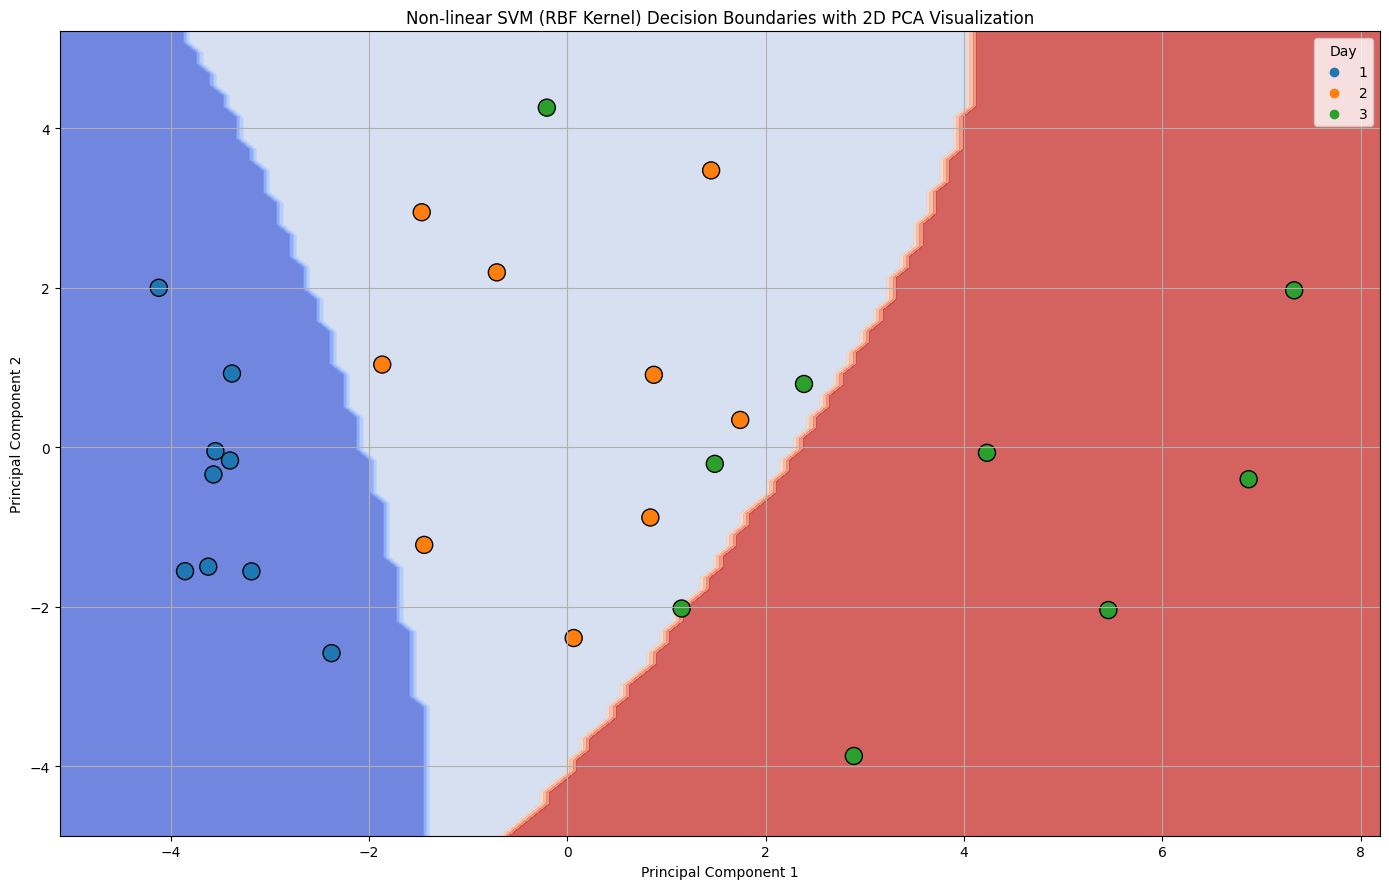

In [34]:
# Predicting the decision boundaries
Z_rbf = svm_rbf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

# Plotting the 2D visualization with SVM decision boundaries using RBF kernel
plt.figure(figsize=(14, 9))
plt.contourf(xx, yy, Z_rbf, cmap='coolwarm', alpha=0.8)
sns.scatterplot(x=pca_data_4[:, 0], y=pca_data_4[:, 1], hue=day_int_labels, palette='tab10', s=150, edgecolor='k', marker='o')
plt.title('Non-linear SVM (RBF Kernel) Decision Boundaries with 2D PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Day', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()